<a href="https://colab.research.google.com/gist/bence0012/713bb214aa4e756b20d6e8d4671b81d4/nii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
import matplotlib.pyplot as plt
import requests

ModuleNotFoundError: No module named 'nibabel'

In [ ]:
import gdown

url = 'https://drive.google.com/u/0/uc?id=1FTUNw1gIYjIphJBfF9p-cAEa2fZVz76G&export=download'
output = 'train_valid.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/u/0/uc?id=1FTUNw1gIYjIphJBfF9p-cAEa2fZVz76G&export=download
To: /content/train_valid.zip
100%|██████████| 1.63G/1.63G [00:12<00:00, 130MB/s]


'train_valid.zip'

In [ ]:
import zipfile
os.mkdir('train_valid')

In [ ]:
with zipfile.ZipFile('train_valid.zip', 'r') as zip_ref:
    zip_ref.extractall('train_valid')

In [ ]:
os.mkdir('train_valid/patients')

In [ ]:
import gzip
import shutil
zero='00'
for i in range(0,100):
  if i>8 :
    zero='0'
  if i>98 :
    zero=""

  with gzip.open('/content/train_valid/training/patient'+zero+str(i+1)+'/patient'+zero+str(i+1)+'_4d.nii.gz', 'rb') as f_in:
    with open('train_valid/patients/patient'+str(i+1)+'.nii', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [ ]:
file=os.path.join(data_path, '/content/train_valid/patients/patient1.nii')
img=nib.load(file)
img.shape

(216, 256, 10, 30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


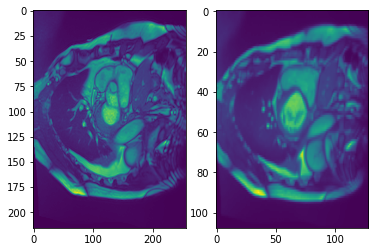

In [ ]:
import cv2

map=img.get_data()
num=1
for i in range(0,1):
  for j in range(0,1):
    plt.subplot(1,2,num)
    num+=1
    plt.imshow(map[:,:,i,j], aspect='auto', cmap='viridis')


lower=cv2.pyrDown(map[:,:,1,1])
plt.subplot(1,2,2)
plt.imshow(lower, aspect='auto', cmap='viridis')
plt.grid(False)
plt.show()

In [ ]:
train=[]
valid=[]
convert=[]
for i in range(0,100):
  file=os.path.join(data_path, '/content/train_valid/patients/patient1.nii')
  img=nib.load(file)
  convert.append(np.asanyarray(img.dataobj))
convert=np.asarray(convert)
for i in range(0,100):
   for j in range(0,10):
     for k in range(0,30):
       valid.append(np.asarray(convert[i,:,:,j,k]))
       train.append(cv2.pyrDown(convert[i,:,:,j,k]))



print(np.asarray(valid).shape)
print(np.asarray(train).shape)

(30000, 216, 256)
(30000, 108, 128)
